In [313]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pytexit

In [314]:
loc_shift = -0.892
scale_shift = 1 / np.sqrt(0.1053)
def pdf(x):
    return (3*(x**2))*np.exp(-x)**3

def cdf(x):
    return -((1/np.e) ** (x**3)) + 1
def make_distribution():
    class MyDistribution(scipy.stats.rv_continuous):
        def _pdf(self, x):
            return pdf(x)

        def _get_support(self):
            return 0, np.inf

    return MyDistribution(momtype=0)

distr = make_distribution()


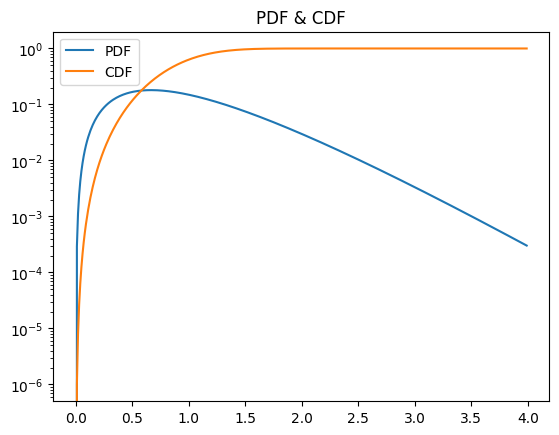

In [315]:
def plot_pdf_cdf():

    x = np.arange(0, 4, 0.01)
    plt.plot(x, pdf(x), label="PDF")
    plt.plot(x, cdf(x), label="CDF")
    plt.legend()
    plt.title("PDF & CDF")
    plt.yscale("log")
    plt.show()

plot_pdf_cdf()

In [316]:
def timeit(func):
    import time
    start = time.time_ns()
    v = func()

    elapsed = time.time_ns() - start

    seconds = elapsed / 1e9
    minutes = seconds / 60
    hours = minutes / 60

    seconds %= 60
    minutes %= 60

    print("Elapsed time: %02dh %02dm %02ds" % (hours, minutes, seconds))

    return v

In [317]:
def plot(size, func, format):
    rand = timeit(lambda : func(size))

    (uniques, count) = np.unique(np.round(rand, decimals=2), return_counts=True)
    count = count / sum(count)

    x = np.arange(0, 4, 0.01)
    plt.bar(uniques, count, color="orange", width=0.05, label="Random values (normalized)")
    plt.plot(uniques, count, color="red", alpha=0.5)
    plt.plot(x, distr.pdf(x), label="PDF")
    plt.title(format % size)
    plt.xlim(0, 2.5)
    plt.yscale("log")
    plt.legend()
    plt.show()


In [318]:
rng = np.random.default_rng(666)
def rvs_rand(size):
    return distr.rvs(size=size, random_state=rng, loc=loc_shift, scale=scale_shift)
def plot_direct(size):
    plot(size, rvs_rand, "RVS (size=%s)")

/var/folders/cf/2srm7pv16hd55gbpcgp20xmc0000gn/T/ipykernel_14144/2544642379.py:4: RuntimeWarning: invalid value encountered in scalar multiply
  return (3*(x**2))*np.exp(-x)**3


Elapsed time: 00h 00m 02s


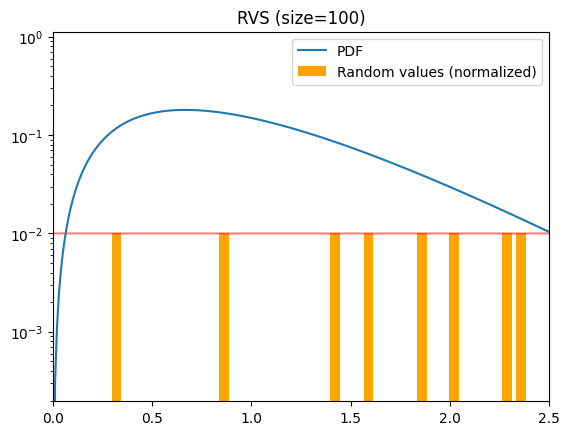

In [319]:
plot_direct(100)

/var/folders/cf/2srm7pv16hd55gbpcgp20xmc0000gn/T/ipykernel_14144/2544642379.py:4: RuntimeWarning: invalid value encountered in scalar multiply
  return (3*(x**2))*np.exp(-x)**3


Elapsed time: 00h 00m 22s


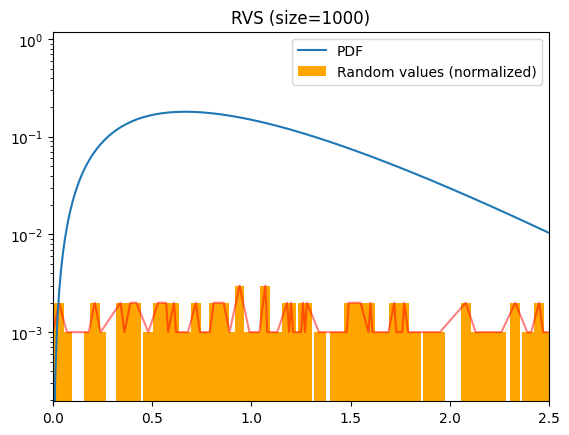

In [320]:
plot_direct(1000)

In [321]:
#plot_direct(10000)

In [322]:
def bin_search(p):
    l = 0
    r = 500
    while r - l > 1e-6:
        m = (l + r) / 2
        if cdf(m) < p:
            l = m
        else:
            r = m
    return l

def inverse_rand(size):

    return np.array([bin_search(p) for p in rng.uniform(size=size)])

def plot_inverse(size):
    plot(size, inverse_rand, "Inverse CDF (size=%s)")

In [323]:
bin_search(0.1)

0.47230813652276993

Elapsed time: 00h 00m 00s


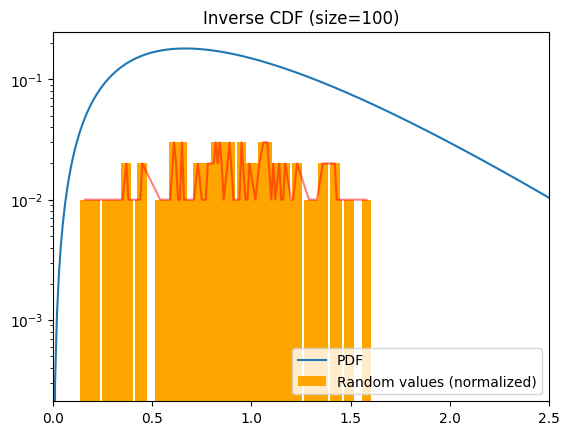

In [324]:
plot_inverse(100)

Elapsed time: 00h 00m 00s


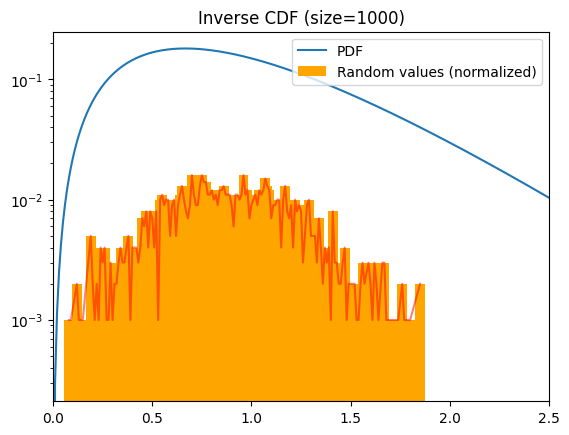

In [325]:
plot_inverse(1000)

Elapsed time: 00h 00m 00s


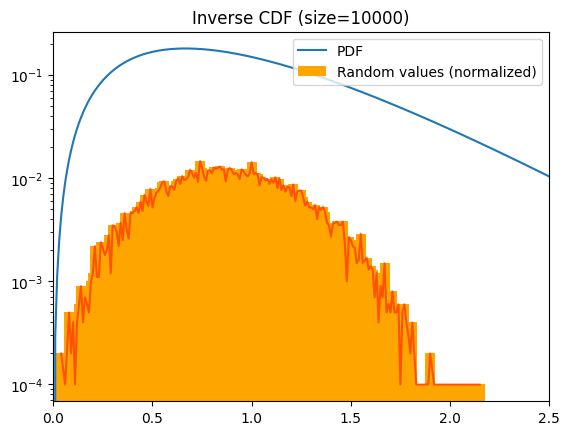

In [326]:
plot_inverse(10000)

Elapsed time: 00h 00m 01s


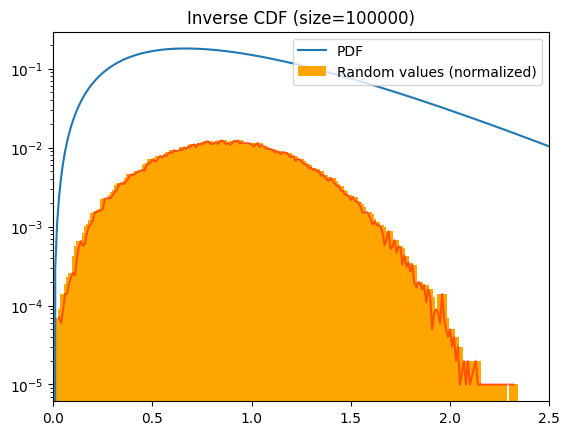

In [327]:
plot_inverse(100000)

Elapsed time: 00h 00m 10s


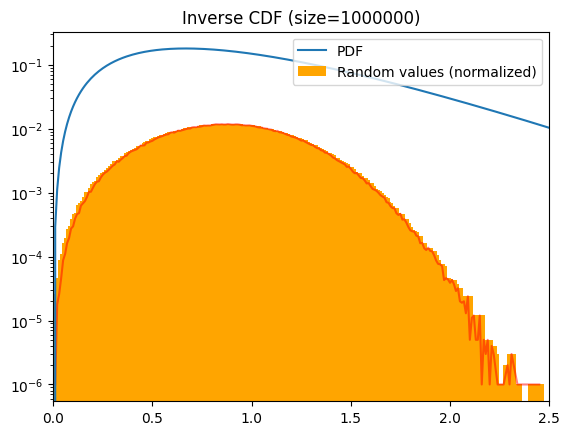

In [328]:
plot_inverse(1000000)

In [329]:
def next_rejection_rand():
    M = distr.pdf(0.874)
    left = 0
    right = 2.5
    width = right - left
    while True:
        y = rng.uniform() * width + left
        u = rng.uniform()
        if u < distr.pdf(y) / M / width:
            return y

def rejection_rand(size):
    return np.array([next_rejection_rand() for _ in range(size)])

def plot_rejection(size):
    plot(size, rejection_rand, "Rejection sampling (size=%s)")

Elapsed time: 00h 00m 00s


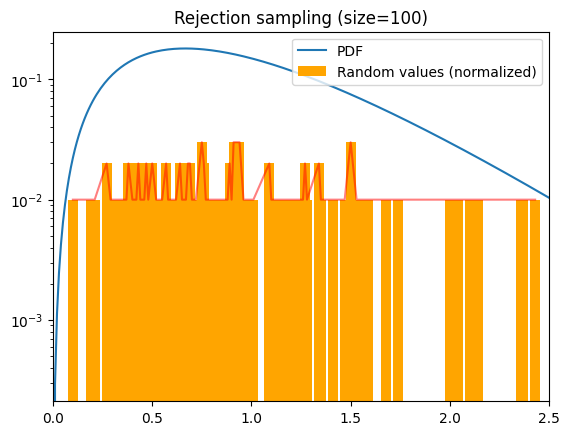

In [330]:
plot_rejection(100)

Elapsed time: 00h 00m 00s


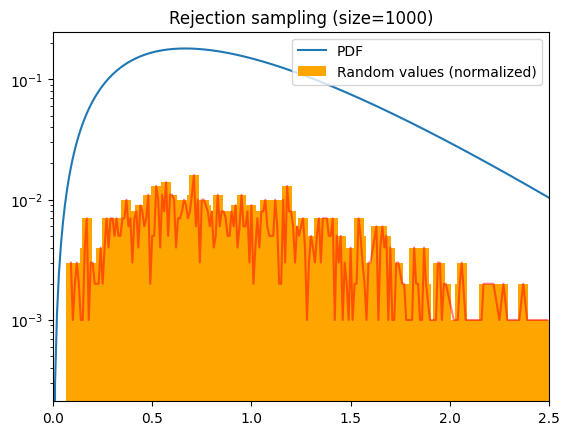

In [331]:
plot_rejection(1000)

Elapsed time: 00h 00m 05s


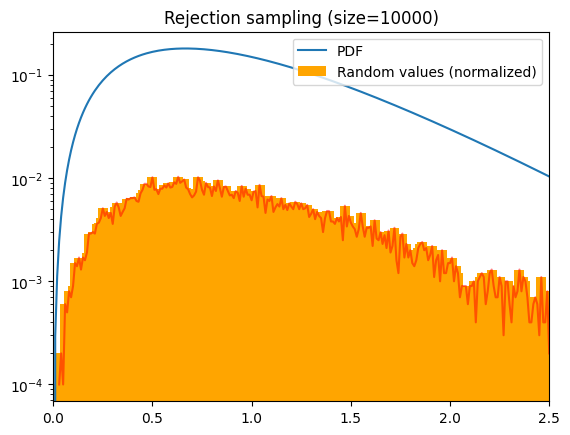

In [332]:
plot_rejection(10000)

Elapsed time: 00h 00m 55s


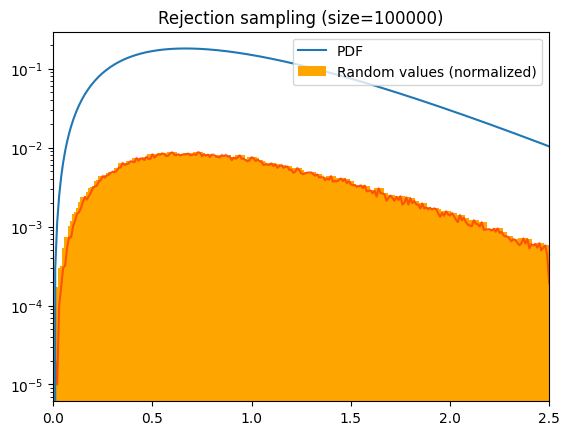

In [333]:
plot_rejection(100000)

/var/folders/cf/2srm7pv16hd55gbpcgp20xmc0000gn/T/ipykernel_14144/2544642379.py:4: RuntimeWarning: invalid value encountered in scalar multiply
  return (3*(x**2))*np.exp(-x)**3


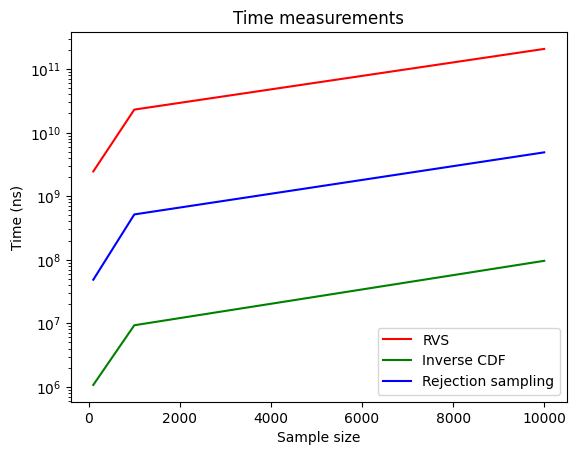

In [334]:
sizes = [100, 1000, 10000]
def measure(func):
    import time
    start = time.time_ns()
    func()
    return time.time_ns() - start

direct = [measure(lambda : rvs_rand(size)) for size in sizes]
inverse = [measure(lambda : inverse_rand(size)) for size in sizes]
rejection = [measure(lambda : rejection_rand(size)) for size in sizes]

plt.plot(sizes, direct, label="RVS", color="red")
plt.plot(sizes, inverse, label="Inverse CDF", color="green")
plt.plot(sizes, rejection, label="Rejection sampling", color="blue")
plt.legend()
plt.ylabel("Time (ns)")
plt.xlabel("Sample size")
plt.title("Time measurements")
plt.yscale("log")
plt.show()